# Wetterstation Kloten

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.interpolate import interp1d
from scipy import integrate
from scipy import optimize

## 1. Import der Daten
   - Beschreibt die Datenstruktur.
   - Zeigt auf, wie viele Messungen es sind.

In [16]:
#load csv file
weather = np.loadtxt('Zürich21-22-GruppeG.csv', skiprows=1, delimiter=';', dtype=str)

#select data for Kloten
klo_weather = weather[weather[:, 0] == 'KLO']

In [17]:
#Daten transponieren
klo_weather_t = np.transpose(klo_weather)

#Arrays für die Daten bereitstellen
time= klo_weather_t[1].astype("datetime64[m]").astype(float) #Zeit im Minutenintervall als float dargestellt
pressure = klo_weather_t[2].astype(float)
temp = klo_weather_t[3].astype(float)
rain = klo_weather_t[4].astype(float)
sunshine = klo_weather_t[5].astype(float)
time_diff = klo_weather_t[6].astype(float)

### Beschreibung der Daten
- #stn: Wetterstation
- time: Zeitpunkt der Messung
- prestah0: Luftdruck [hPa]
- tre200h0: Lufttemperatur [°C]
- rre150h0: Niederschlagssumme [mm]
- su2000h0: Sonnenscheindauer [%]
- time_diff: Stunden seit Messbeginn [h]

### Anzahl Messungen

In [18]:
print("Anzahl Messungen:", len(klo_weather))

Anzahl Messungen: 7473


## 2. Da einige Datenpunkte fehlen, müsst ihr diese interpolieren.
   - Wählt dazu eine geeignete Methode und begründet eure Wahl.
   - Führt die Methode durch, um eine interpolierte Version der Daten mit mindestens doppelt so vielen Punkten zu erzeugen.

### Daten Interpolieren

In [19]:
# Maximaler Zeitunterschied bestimmen
max = int(np.max(time_diff))

#Erzeugen des Zeitvektors mit den fehlenden Stunden und Intervall auf Halbstundenbasis verkürzen
time_new = np.linspace(time.min(), time.max(), ((2*max)+1), dtype=int) 

#Daten kubische und linear interpolieren
f_cubic     = interp1d(time, klo_weather_t[2:6], kind='cubic')
f_linear    = interp1d(time, klo_weather_t[2:6], kind = 'linear')

pressure_inter_cubic, temp_inter_cubic, rain_inter_cubic, sunshine_inter_cubic       = f_cubic(time_new)
pressure_inter_linear, temp_inter_linear, rain_inter_linear, sunshine_inter_linear   = f_linear(time_new)


#time zu datetime umwandeln für spätere Darstellungszwecke
time_datetime = time.astype("datetime64[m]")
time_datetime_inter = time_new.astype("datetime64[m]")

### Interpolationsmethode vergleichen

In [20]:
#Daten für Demo vorbereiten 
datetime_demo= time_datetime[:25]
max_demo = 2 * int(np.max(time_diff[:25])) + 1

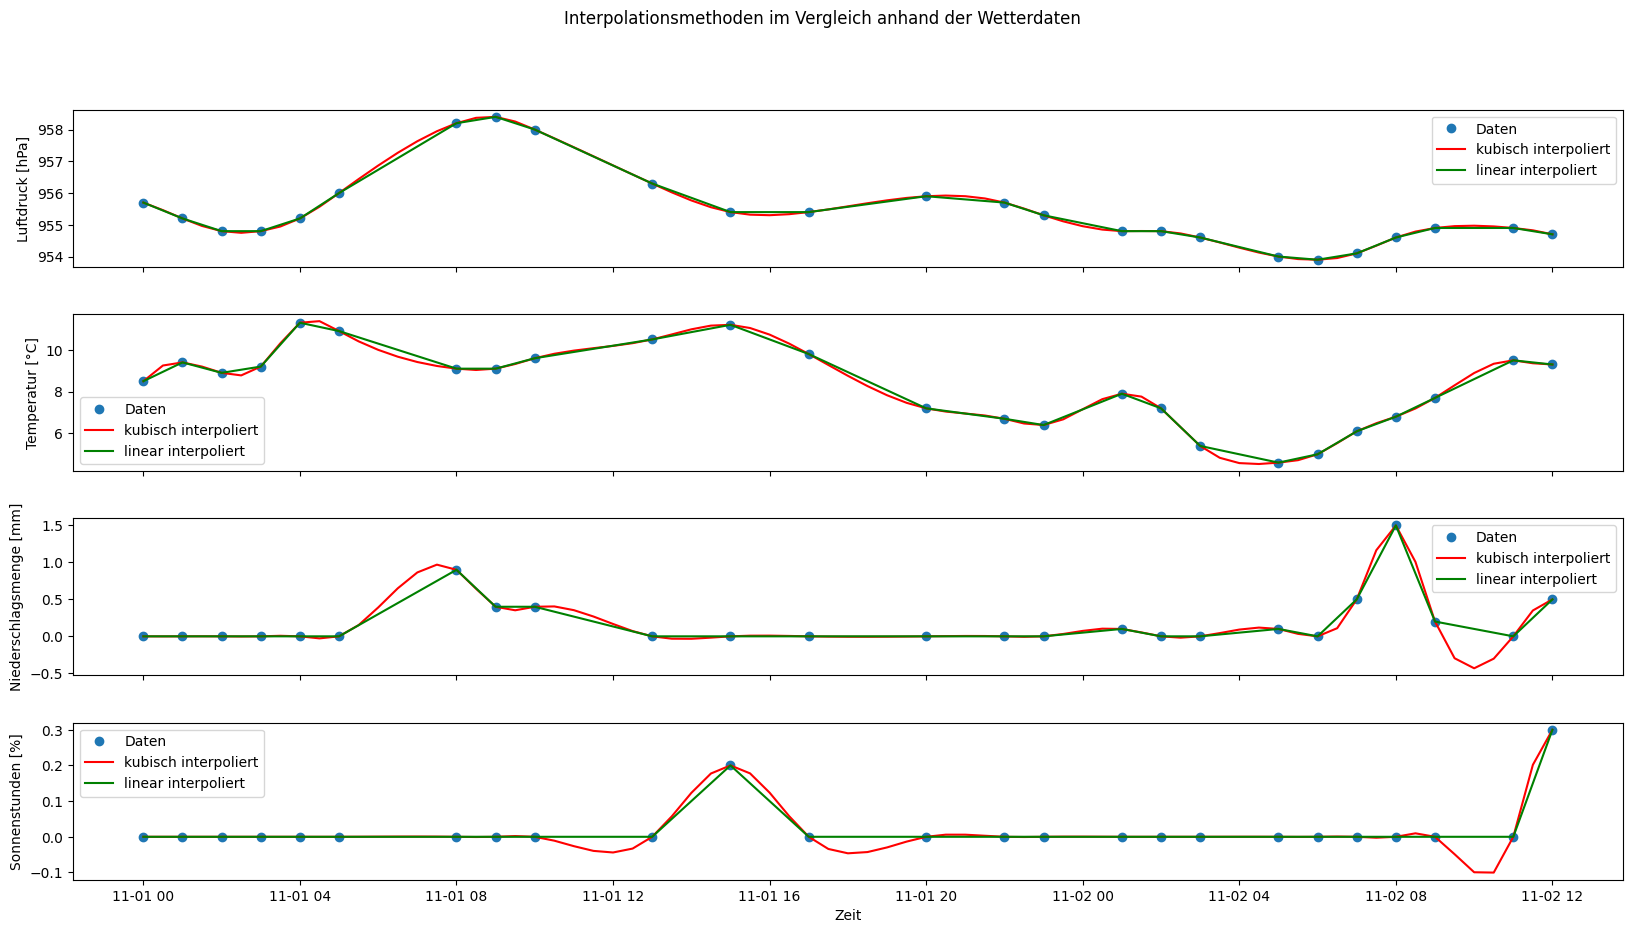

In [21]:
#Plot über einen bestimmten Zeitraum um die Interpolationsmethoden zu vergleichen
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

ax1.plot(datetime_demo, pressure[:25], 'o', label='Daten')
ax1.plot(time_datetime_inter[0:max_demo], pressure_inter_cubic[0:max_demo], 'r-', label='kubisch interpoliert')
ax1.plot(time_datetime_inter[0:max_demo], pressure_inter_linear[0:max_demo], 'g-', label='linear interpoliert')
ax1.set_ylabel('Luftdruck [hPa]')
ax1.legend()

ax2.plot(datetime_demo, temp[:25], 'o', label='Daten')
ax2.plot(time_datetime_inter[0:max_demo], temp_inter_cubic[0:max_demo], 'r-', label='kubisch interpoliert')
ax2.plot(time_datetime_inter[0:max_demo], temp_inter_linear[0:max_demo], 'g-', label='linear interpoliert')
ax2.set_ylabel('Temperatur [°C]')
ax2.legend()

ax3.plot(datetime_demo, rain[:25], 'o', label='Daten')
ax3.plot(time_datetime_inter[0:max_demo], rain_inter_cubic[0:max_demo], 'r-', label='kubisch interpoliert')
ax3.plot(time_datetime_inter[0:max_demo], rain_inter_linear[0:max_demo], 'g-', label='linear interpoliert')
ax3.set_ylabel('Niederschlagsmenge [mm]')
ax3.legend()

ax4.plot(datetime_demo, sunshine[:25], 'o', label='Daten')
ax4.plot(time_datetime_inter[0:max_demo], sunshine_inter_cubic[0:max_demo], 'r-', label='kubisch interpoliert')
ax4.plot(time_datetime_inter[0:max_demo], sunshine_inter_linear[0:max_demo], 'g-', label='linear interpoliert')
ax4.set_ylabel('Sonnenstunden [%]')
ax4.legend()

plt.xlabel('Zeit')
plt.suptitle('Interpolationsmethoden im Vergleich anhand der Wetterdaten')
plt.show()

### Auswahl der Interpolationsmethoden

Entscheidung: 
Da die kubische Interpolationsmethode eine präzisere Darstellung liefert und komplexere Schwankungen in den Daten darstellen kann, wurde diese Methode für die Temperatur- und die Luftdruckdaten verwendet. Die lineare Interpolation wäre ungenauer gewesen.

Die Sonnenstunden und die Niederschlagsmengen wurden linear interpoliert, da die lineare Interpolationsmethode eine angemessener Annäherung an die Daten bietet, insbesondere da die Werte nicht unter Null fallen können. 

## 3. Ihr sollt alle Variablen (Luftdruck, Temperatur, Regenmenge und Sonnenstunden) über einen selbstgewählten Zeitraum darstellen. 
   - Basisvariante: Wähle einen interessanten Zeitraum von 1-2 Wochen.
   - Schwierigere Variante (mehr Punkte): Errechne tageweise Durchschnitte, um die Variablen in einem grösseren Zeitraum (mehrere Monate/Quartal) darzustellen.

### Tagesdurschnitt berechnen

In [22]:
#Variablen instanzieren
daily_pressure = np.array([]).astype(float)
daily_average_pressure = 0

daily_temp = np.array([]).astype(float)
daily_average_temp = 0

daily_rain = np.array([]).astype(float)
daily_average_rain = 0

daily_sunshine = np.array([]).astype(float)
daily_average_sun = 0

#Versuch mit date_array
date = np.array([]).astype(datetime.date)
#date = np.empty(365, dtype='datetime64[D]')

#für den letzten Tag wird der Durchschnitt nicht gerechnet, da die letzte stunde fehlt und somit wir die Daten für genau ein Jahr haben.
incomplete_hours = len(time_new) % 48

#Tagesdurschnitt berechnen (pro Tag 48 Messwerte)
for i in range(len(time_new) - incomplete_hours):
    daily_average_pressure += pressure_inter_cubic[i]
    daily_average_temp += temp_inter_cubic[i]
    daily_average_rain += rain_inter_linear[i]
    daily_average_sun += sunshine_inter_linear[i]
    if (i+1) % 48 == 0:
        daily_pressure = np.append(daily_pressure, daily_average_pressure/48)
        daily_average_pressure = 0
        daily_temp = np.append(daily_temp, daily_average_temp/48)
        daily_average_temp = 0
        daily_rain = np.append(daily_rain, daily_average_rain/48)
        daily_average_rain = 0
        daily_sunshine = np.append(daily_sunshine, daily_average_sun/48)
        daily_average_sun = 0
        date = np.append(date, time_datetime_inter[i].astype(datetime.datetime).date())



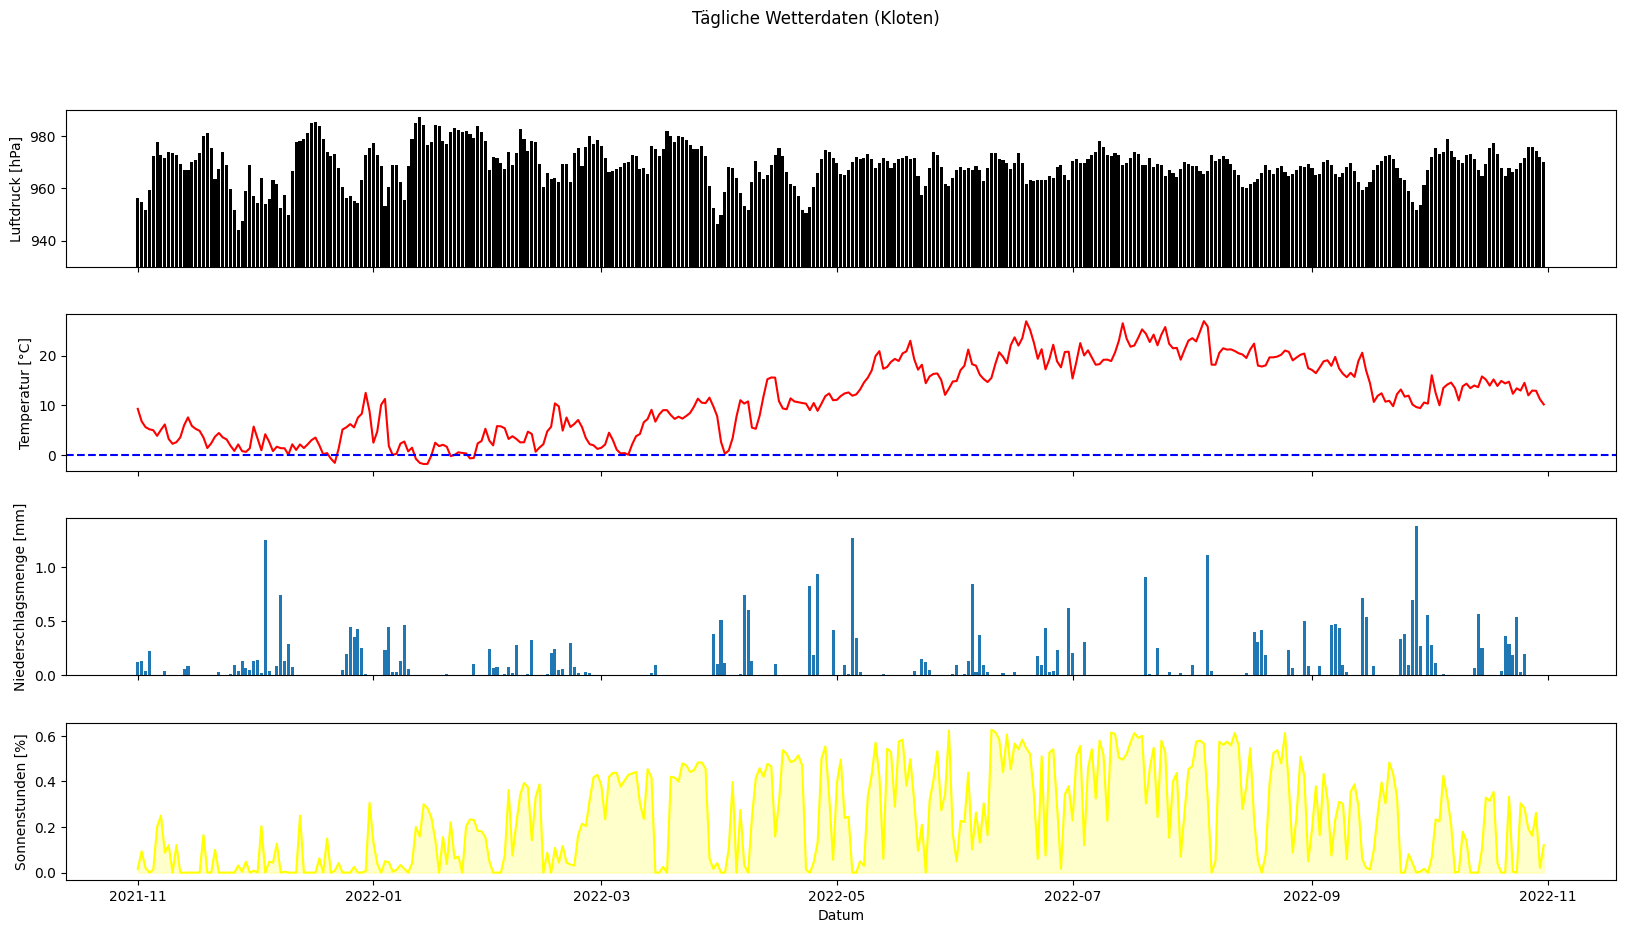

In [23]:
# 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

ax1.bar(date, daily_pressure, color='black')
ax1.set_ylim(930,990)
ax1.set_ylabel('Luftdruck [hPa]')


ax2.plot(date, daily_temp, color='red')
ax2.set_ylabel('Temperatur [°C]')

# Linie bei Null zeichnen
ax2.axhline(0, color='blue', linestyle='--')

ax3.bar(date, daily_rain)
ax3.set_ylabel('Niederschlagsmenge [mm]')

ax4.plot(date, daily_sunshine, color='yellow')
ax4.fill_between(date, daily_sunshine, 0, alpha=0.2, color='yellow')
#ax4.set_ylim(0,1)
ax4.set_ylabel('Sonnenstunden [%]')

plt.xlabel('Datum')
#plt.xlim(start_date, end_date)
plt.suptitle('Tägliche Wetterdaten (Kloten)')
plt.show()

## 4. Für die folgenden Punkte sollt ihr eine der Variablen auswählen.
   - Entweder Luftdruck, Temperatur, Regenmenge oder Sonnenstunden

#### Temperature it is!

## 5. Vergleicht die ursprünglichen Daten mit den interpolierten Daten und zeigt eure Erkenntnisse auf. 
   - Hier könnt ihr euch z.B. fragen, wie sich unterschiedliche Interpolationsmethoden verhalten.

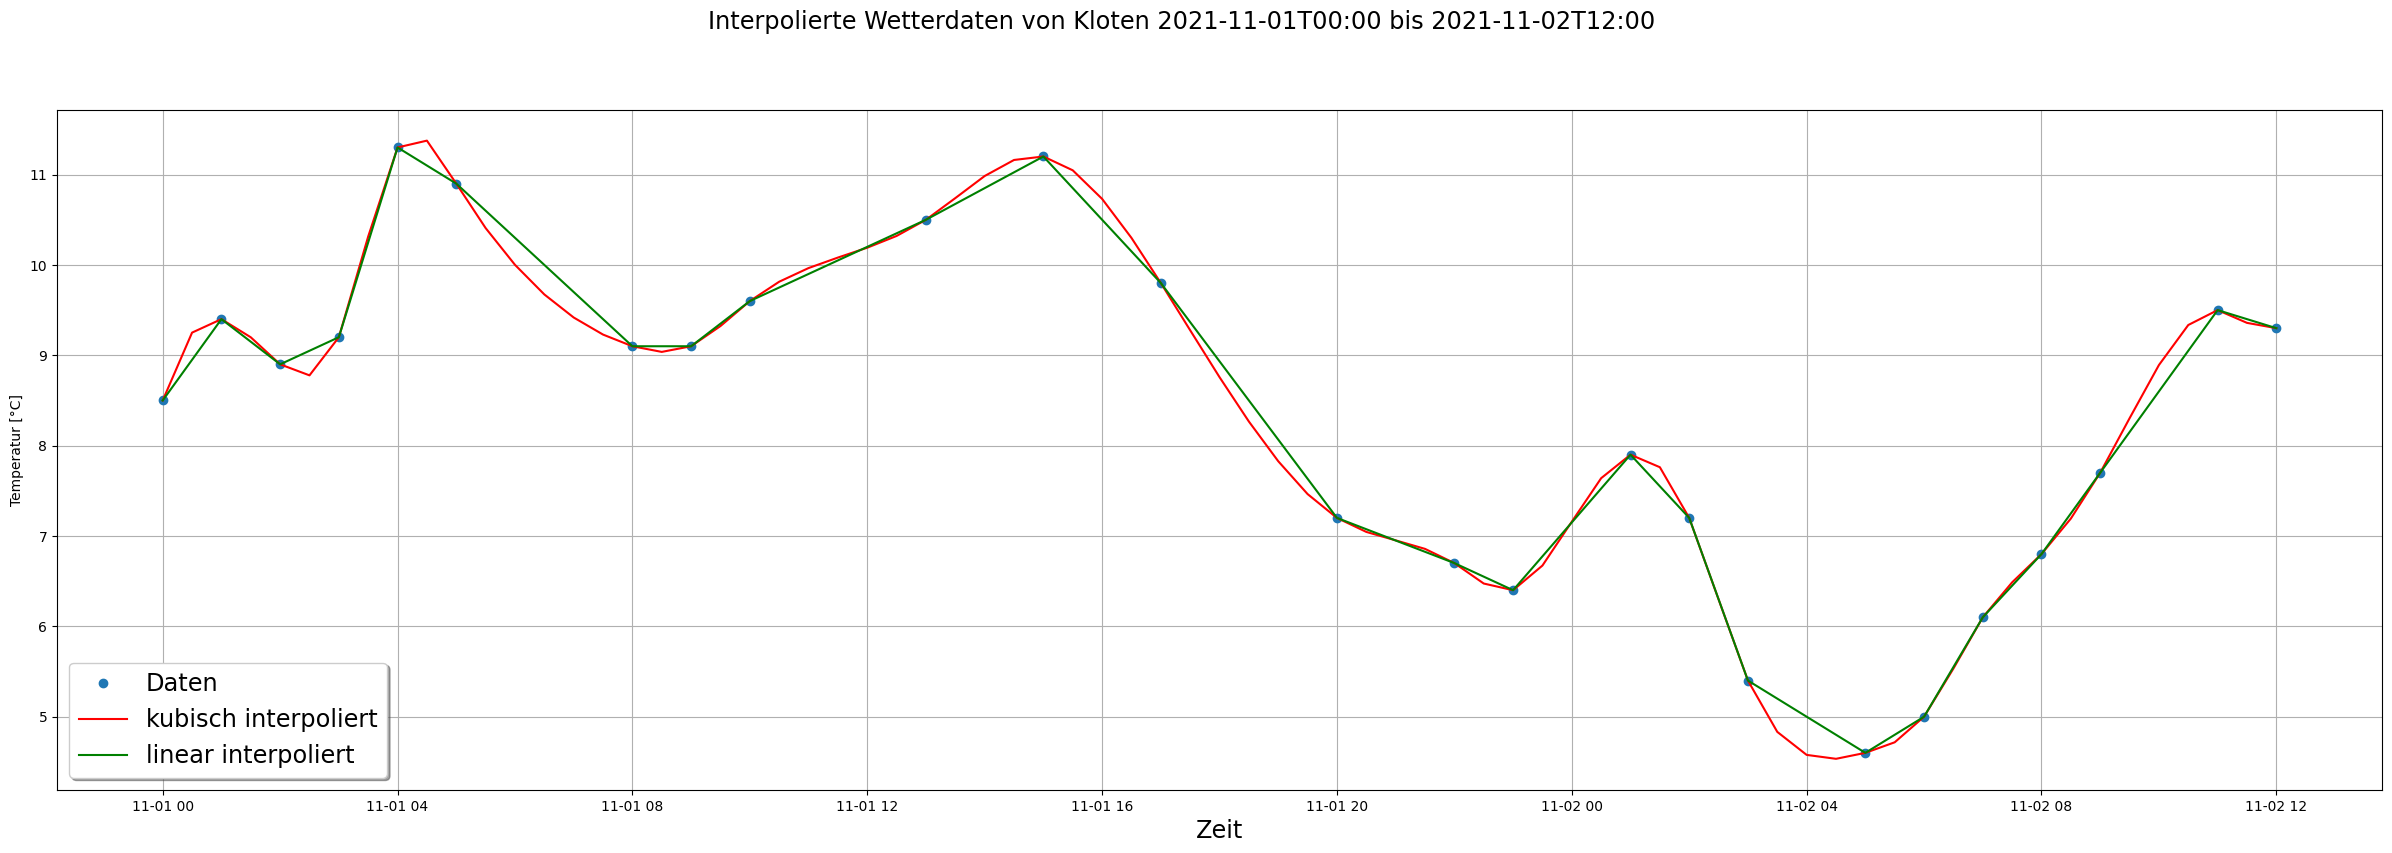

In [24]:
fig, ax2 = plt.subplots(1, 1, sharex=True, figsize=(30,10), gridspec_kw={'bottom': 0.2}) #gridspec_kw={'bottom': 0.2} sorgt dafür, dass die x-Achse nicht abgeschnitten wird
# Plot ax2 mit dem markierten Bereich
ax2.plot(datetime_demo, temp[:25], 'o', label='Daten')
ax2.plot(time_datetime_inter[0:max_demo], temp_inter_cubic[0:max_demo], 'r-', label='kubisch interpoliert')
ax2.plot(time_datetime_inter[0:max_demo], temp_inter_linear[0:max_demo], 'g-', label='linear interpoliert')
ax2.set_ylabel('Temperatur [°C]')
ax2.legend( loc='lower left', shadow=True, fontsize='xx-large')

plt.grid()
plt.xlabel('Zeit', fontsize='xx-large')

plt.suptitle('Interpolierte Wetterdaten von Kloten {0} bis {1}'.format(time_datetime_inter[0], time_datetime_inter[max_demo-1]), fontsize='xx-large')
plt.show()

## 6. Berechnet Nullstellen bzw. Schnittpunkte mit einem Schwellenwert und überlegt euch, welche Aussagen ihr daraus ableiten könnt.
   - Ihr könntet z.B. sagen: "In Davos hatten wir im Winter X-mal weniger als Null Grad." oder "An welchen Tagen wurde die Regenmenge XY erreicht?".

In [25]:
# Indexe der Zahlen im Bereich von -1 bis 1 finden
#indices = np.where((temp_inter_linear >= -0.01) & (temp_inter_linear <= 0.01))
nullstellen = np.where(temp_inter_linear == 0)

temp_inter_linear[nullstellen]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
zer0temp_days = time_datetime_inter[nullstellen]

# Eindeutige Tage extrahieren
unique_days = np.unique(np.datetime_as_string(zer0temp_days, unit='D'))

unique_days

array(['2021-11-09', '2021-11-10', '2021-11-26', '2021-11-27',
       '2021-11-28', '2021-11-29', '2021-12-03', '2021-12-06',
       '2021-12-19', '2021-12-20', '2022-01-05', '2022-01-06',
       '2022-01-10', '2022-01-12', '2022-01-24', '2022-01-26',
       '2022-01-27', '2022-01-30', '2022-02-10', '2022-02-26',
       '2022-02-28', '2022-03-04', '2022-03-05', '2022-03-07',
       '2022-03-09', '2022-03-20', '2022-04-02'], dtype='<U28')

In [29]:
f_cubic_temp = interp1d(time_diff, klo_weather_t[3:4], kind = 'cubic') 

In [33]:
print(f_cubic_temp(0))
zero = optimize.newton(f_cubic_temp, 1000)
print(zero)
#print(temp_inter_linear[1900:2000])

zero1 = optimize.newton(f_cubic_temp, 150)
print(zero1)

[8.5]
[[[[[[[[[[[[[[[[[1162.40363573]]]]]]]]]]]]]]]]]
[[[[[[[[[[141.77417206]]]]]]]]]]


## 7. Mithilfe der Ableitung soll nach grossen Änderungen in den Daten gesucht werden. 
   - So könnt ihr z.B. sagen: "Am Tag X hatten wir die grösste Änderungsrate des Luftdrucks".

In [ ]:
#Steigung der Temperaturen berechnen
df = np.gradient(temp_inter_cubic)

#Index der kleinste steigung bzw. grösste Abnahme auslesen
i_min = np.argmin(df)
#Index der grössten steigung auslesen
i_max = np.argmax(df) 

print("maximale Abnahme:",(df[i_min]), "am", (time_datetime_inter[i_min])) 
print("maximale Zunahme:",(df[i_max]), "am", (time_datetime_inter[i_max]))

In [ ]:
#überprüfung der werte
print(temp_inter_cubic[i_min-2:i_min+1])
print(temp_inter_cubic[i_max-2:i_max+1])

## 8. Benutze die Integration, um gewisse Durchschnittswerte über einen definierten Zeitraum zu berechnen.
   - So könnt ihr z.B. die durchschnittlichen Sonnenstunden über den Sommer aufzeigen.

In [ ]:
def mean_func(func, a, b):
    integral, error = integrate.quad(func, a, b)
    return integral / (b - a)

In [ ]:
mean_temp = mean_func(f_cubic_temp, 0, 500)
print(mean_temp)

np.mean(temp_inter_cubic[:500]) # wäre das nicht einfacher und genauer?

In [ ]:
#Zeitraum muss noch angepasst werden
ausgewählter_zeitraum_x = time_datetime_inter[:500]
ausgewählter_zeitraum_y = temp_inter_cubic[:500]

In [ ]:
plt.plot(ausgewählter_zeitraum_x, ausgewählter_zeitraum_y, color='red', label='Temperatur')
plt.fill_between(ausgewählter_zeitraum_x, ausgewählter_zeitraum_y, alpha=0.1, color='red')
plt.axhline(y=mean_temp, color='c', linestyle='--', label='Durchschnitt')
plt.xlabel("Datum")
plt.ylabel("Temperatur [°C]")
plt.title("Interpolierte Temperatur mit Mittelwert")
plt.legend()
plt.grid()
plt.show()

print("Die Durschnittstemperatur durch den Sommer betrug", mean_temp, "°C")